In [15]:
pip install numpy pandas matplotlib seaborn scikit-learn imbalanced-learn python-dateutil geopy joblib flask fastapi uvicorn jupyter


Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [17]:
fraud_data = pd.read_csv("C:/Users/DELL/Desktop/PROJECTS/FINANCIAL FRAUD DETECTION/fraudTest.csv")

In [18]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [19]:
fraud_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [20]:
fraud_data.groupby(['is_fraud','category']).agg({'amt':'mean', 'category':'count'}).sort_values('amt', ascending=False)

amt  category
is_fraud category                            
1        shopping_net    994.316067       506
         shopping_pos    886.794601       213
         misc_net        804.280712       267
         entertainment   509.765593        59
         grocery_pos     313.127258       485
         home            257.616418        67
         misc_pos        193.386389        72
         food_dining     122.361852        54
0        grocery_pos     114.048069     52068
         travel          112.627928     17409
         shopping_pos     73.382778     49578
         shopping_net     72.314977     41273
         misc_net         71.450544     27100
         gas_transport    63.718286     56216
         entertainment    63.328052     40045
         misc_pos         61.908444     34502
         home             57.739577     52278
         kids_pets        57.557286     48627
         health_fitness   53.915020     36622
         grocery_net      53.820633     19385
         food_dining      50.679363     39214
         personal_care    48.272806     39257
1        personal_care    25.920571        70
         health_fitness   20.352308        52
         kids_pets        19.822308        65
         gas_transport    12.002727       154
         grocery_net      11.668049        41
         travel            8.699500        40

In [21]:
fraud_data.groupby(['is_fraud']).agg({'amt':'mean'}).reset_index().rename(columns={'amt':'avg_amt'})

,is_fraud,avg_amt
0,0,67.614408
1,1,528.356494


In [22]:
# take 1% sample
df_train = pd.concat([fraud_data[fraud_data['is_fraud']==1].sample(frac=0.1, replace=False),
                      fraud_data[fraud_data['is_fraud']==0].sample(frac=0.01, replace=False)],
                    axis=0)
df_train = df_train.sample(frac = 1, replace=False)
df_train = df_train.reset_index(drop=True)

In [23]:
df_train['is_fraud'].value_counts()

is_fraud
0    5536
1     214
Name: count, dtype: int64

In [24]:
751/(751+12892)

0.05504654401524591

In [25]:
# drop some categorical columns
dropped_colnames = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num',
                    'first', 'last', 'street', 'zip',
                    'trans_num', 'unix_time']
df_train = df_train.drop(columns=dropped_colnames)

In [26]:

# process date of birth
df_train['dob_year'] = pd.DatetimeIndex(df_train['dob']).year
df_train['dob_month'] = pd.DatetimeIndex(df_train['dob']).month
df_train = df_train.drop(columns=['dob'])

In [27]:
df_train.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,dob_year,dob_month
0,fraud_Kutch-Ferry,home,22.63,F,Thrall,TX,30.5920,-97.2893,1766,Press sub,31.539986,-98.146285,0,1976,1
1,"fraud_Monahan, Bogisich and Ledner",misc_pos,33.34,F,Superior,AZ,33.2887,-111.0985,2872,Petroleum engineer,34.029470,-110.345027,0,1987,10
2,fraud_Waelchi Inc,kids_pets,1.50,M,Parks,AZ,35.2563,-111.9500,759,"Geologist, engineering",35.869953,-111.128826,0,1957,3
3,fraud_Jast and Sons,food_dining,57.03,F,Darien,GA,31.3826,-81.4312,5989,Tax adviser,31.323326,-80.678173,0,1967,5
4,"fraud_Kerluke, Considine and Macejkovic",misc_net,9.45,F,Cottekill,NY,41.8467,-74.1038,722,Comptroller,42.570176,-73.377896,0,1990,10


In [28]:
df_train_encoded = pd.get_dummies(df_train)

In [29]:
df_train_encoded.shape

(5750, 2062)

In [30]:
X,y = df_train_encoded.drop(columns=['is_fraud']).copy(), df_train_encoded['is_fraud']

In [31]:
X

,amt,lat,long,city_pop,merch_lat,merch_long,dob_year,dob_month,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,...,job_Video editor,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
0,22.63,30.5920,-97.2893,1766,31.539986,-98.146285,1976,1,False,False,...,False,False,False,False,False,False,False,False,False,False
1,33.34,33.2887,-111.0985,2872,34.029470,-110.345027,1987,10,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.50,35.2563,-111.9500,759,35.869953,-111.128826,1957,3,False,False,...,False,False,False,False,False,False,False,False,False,False
3,57.03,31.3826,-81.4312,5989,31.323326,-80.678173,1967,5,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9.45,41.8467,-74.1038,722,42.570176,-73.377896,1990,10,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5745,130.91,39.8153,-91.2627,1656,38.994770,-91.898369,1969,8,False,False,...,False,False,False,False,False,False,False,False,False,False
5746,90.41,38.9367,-76.9940,601723,38.425551,-77.959142,1991,2,False,False,...,False,False,False,False,False,False,False,False,False,False
5747,92.56,38.4207,-79.4629,99,39.047218,-78.555854,1986,3,False,False,...,False,False,False,False,False,False,False,False,False,False
5748,30.90,41.3660,-98.0054,1749,41.595911,-98.106490,1973,5,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:

import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [33]:
#kfold
kf = KFold(n_splits=5)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1150 1151 1152 ... 5747 5748 5749]
  Test:  index=[   0    1    2 ... 1147 1148 1149]
Fold 1:
  Train: index=[   0    1    2 ... 5747 5748 5749]
  Test:  index=[1150 1151 1152 ... 2297 2298 2299]
Fold 2:
  Train: index=[   0    1    2 ... 5747 5748 5749]
  Test:  index=[2300 2301 2302 ... 3447 3448 3449]
Fold 3:
  Train: index=[   0    1    2 ... 5747 5748 5749]
  Test:  index=[3450 3451 3452 ... 4597 4598 4599]
Fold 4:
  Train: index=[   0    1    2 ... 4597 4598 4599]
  Test:  index=[4600 4601 4602 ... 5747 5748 5749]


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [35]:
# NULL Model
from sklearn.linear_model import LogisticRegression


IS_res = {
    "accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "G-mean": []
}

OOS_res = {
    "accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "G-mean": []
}
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model_null = LogisticRegression()
    model_null.fit(np.ones((len(y_train),1)), y_train)

    # IS
    y_pred = model_null.predict(np.ones((len(y_train),1)))
    cm = confusion_matrix(y_train, y_pred, labels=model_null.classes_)
    IS_res['accuracy'].append(model_null.score(np.ones((len(y_train),1)),y_train))
    IS_res['Sensitivity'].append(recall_score(y_train, y_pred))
    IS_res['Specificity'].append(cm[0,0]/ (cm[0,0]+cm[0,1]))
    IS_res['G-mean'].append(sqrt(IS_res['Sensitivity'][i] * IS_res['Specificity'][i]))

    print("In Sample:")
    print("accuracy:\t", IS_res['accuracy'][i])
    print("Sensitivity:\t", IS_res['Sensitivity'][i])
    print("Specificity:\t", IS_res['Specificity'][i])
    print("G-mean:\t", IS_res['G-mean'][i])

    # OOS
    y_pred = model_null.predict(np.ones((len(y_test),1)))
    cm = confusion_matrix(y_test, y_pred, labels=model_null.classes_)
    OOS_res['accuracy'].append(model_null.score(np.ones((len(y_test),1)),y_test))
    OOS_res['Sensitivity'].append(recall_score(y_test, y_pred))
    OOS_res['Specificity'].append(cm[0,0]/ (cm[0,0]+cm[0,1]))
    OOS_res['G-mean'].append(sqrt(OOS_res['Sensitivity'][i] * OOS_res['Specificity'][i]))

    print("Out of Sample:")
    print("accuracy:\t", OOS_res['accuracy'][i])
    print("Sensitivity:\t", OOS_res['Sensitivity'][i])
    print("Specificity:\t", OOS_res['Specificity'][i])
    print("G-mean:\t\t", OOS_res['G-mean'][i])

IS_res = pd.DataFrame(IS_res)
OOS_res = pd.DataFrame(OOS_res)

display(IS_res)
display(IS_res.mean(axis=0))
display(OOS_res)
display(OOS_res.mean(axis=0))

Fold 0:
In Sample:
accuracy:	 0.9654347826086956
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:	 0.0
Out of Sample:
accuracy:	 0.9521739130434783
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:		 0.0
Fold 1:
In Sample:
accuracy:	 0.9639130434782609
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:	 0.0
Out of Sample:
accuracy:	 0.9582608695652174
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:		 0.0
Fold 2:
In Sample:
accuracy:	 0.9606521739130435
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:	 0.0
Out of Sample:
accuracy:	 0.971304347826087
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:		 0.0
Fold 3:
In Sample:
accuracy:	 0.9628260869565217
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:	 0.0
Out of Sample:
accuracy:	 0.9626086956521739
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:		 0.0
Fold 4:
In Sample:
accuracy:	 0.9610869565217391
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:	 0.0
Out of Sample:
accuracy:	 0.9695652173913043
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:		 0.0


,accuracy,Sensitivity,Specificity,G-mean
0,0.965435,0.0,1.0,0.0
1,0.963913,0.0,1.0,0.0
2,0.960652,0.0,1.0,0.0
3,0.962826,0.0,1.0,0.0
4,0.961087,0.0,1.0,0.0


accuracy       0.962783
Sensitivity    0.000000
Specificity    1.000000
G-mean         0.000000
dtype: float64

,accuracy,Sensitivity,Specificity,G-mean
0,0.952174,0.0,1.0,0.0
1,0.958261,0.0,1.0,0.0
2,0.971304,0.0,1.0,0.0
3,0.962609,0.0,1.0,0.0
4,0.969565,0.0,1.0,0.0


accuracy       0.962783
Sensitivity    0.000000
Specificity    1.000000
G-mean         0.000000
dtype: float64

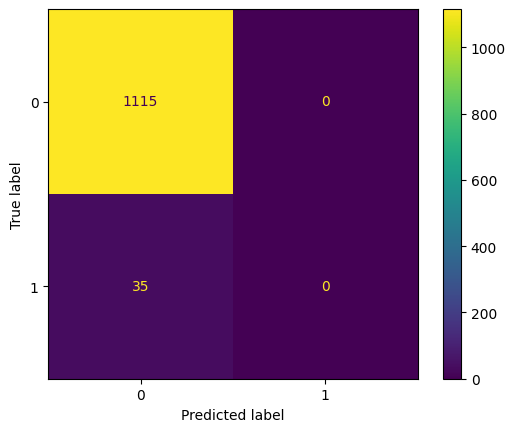

In [36]:
#OOS
y_pred = model_null.predict(np.ones((len(y_test),1)))
cm = confusion_matrix(y_test, y_pred, labels=model_null.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_null.classes_)
disp.plot()
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-

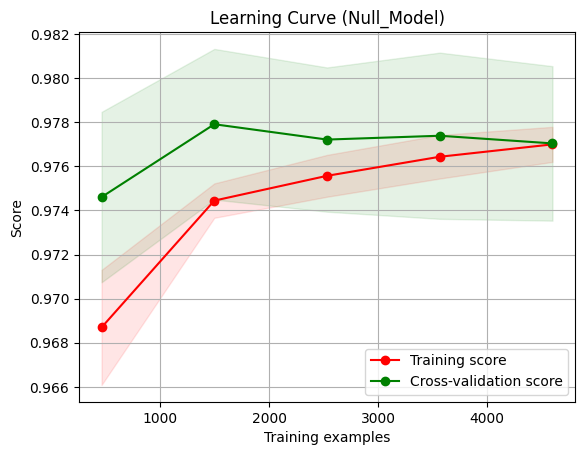

In [37]:
title = "Learning Curve (Null_Model)"
plot_learning_curve(model_null, title, X, y, cv=kf)
plt.show()

In [38]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression


IS_res = {
    "accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "G-mean": []
}

OOS_res = {
    "accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "G-mean": []
}
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model_lr = LogisticRegression()
    model_lr.fit(X_train,y_train)

    # IS
    y_pred = model_lr.predict(X_train)
    cm = confusion_matrix(y_train, y_pred, labels=model_lr.classes_)
    IS_res['accuracy'].append(model_lr.score(X_train,y_train))
    IS_res['Sensitivity'].append(recall_score(y_train, y_pred))
    IS_res['Specificity'].append(cm[0,0]/ (cm[0,0]+cm[0,1]))
    IS_res['G-mean'].append(sqrt(IS_res['Sensitivity'][i] * IS_res['Specificity'][i]))

    print("In Sample:")
    print("accuracy:\t", IS_res['accuracy'][i])
    print("Sensitivity:\t", IS_res['Sensitivity'][i])
    print("Specificity:\t", IS_res['Specificity'][i])
    print("G-mean:\t", IS_res['G-mean'][i])

    # OOS
    y_pred = model_lr.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model_lr.classes_)
    OOS_res['accuracy'].append(model_lr.score(X_test, y_test))
    OOS_res['Sensitivity'].append(recall_score(y_test, y_pred))
    OOS_res['Specificity'].append(cm[0,0]/ (cm[0,0]+cm[0,1]))
    OOS_res['G-mean'].append(sqrt(OOS_res['Sensitivity'][i] * OOS_res['Specificity'][i]))

    print("Out of Sample:")
    print("accuracy:\t", OOS_res['accuracy'][i])
    print("Sensitivity:\t", OOS_res['Sensitivity'][i])
    print("Specificity:\t", OOS_res['Specificity'][i])
    print("G-mean:\t\t", OOS_res['G-mean'][i])

IS_res = pd.DataFrame(IS_res)
OOS_res = pd.DataFrame(OOS_res)

display(IS_res)
display(IS_res.mean(axis=0))
display(OOS_res)
display(OOS_res.mean(axis=0))

Fold 0:


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In Sample:
accuracy:	 0.9780434782608696
Sensitivity:	 0.44654088050314467
Specificity:	 0.9970727313668093
G-mean:	 0.6672583722893333
Out of Sample:
accuracy:	 0.9739130434782609
Sensitivity:	 0.509090909090909
Specificity:	 0.9972602739726028
G-mean:		 0.7125279920655478
Fold 1:


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In Sample:
accuracy:	 0.9771739130434782
Sensitivity:	 0.4457831325301205
Specificity:	 0.9970681100586378
G-mean:	 0.6666904419952535
Out of Sample:
accuracy:	 0.9739130434782609
Sensitivity:	 0.4166666666666667
Specificity:	 0.9981851179673321
G-mean:		 0.6449112077020539
Fold 2:


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In Sample:
accuracy:	 0.9773913043478261
Sensitivity:	 0.49171270718232046
Specificity:	 0.9972844534962662
G-mean:	 0.7002695470027881
Out of Sample:
accuracy:	 0.9773913043478261
Sensitivity:	 0.45454545454545453
Specificity:	 0.9928379588182632
G-mean:		 0.6717812004522222
Fold 3:


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In Sample:
accuracy:	 0.9767391304347826
Sensitivity:	 0.4678362573099415
Specificity:	 0.9963874463761572
G-mean:	 0.6827489829675555
Out of Sample:
accuracy:	 0.9765217391304348
Sensitivity:	 0.3953488372093023
Specificity:	 0.999096657633243
G-mean:		 0.6284836528144571
Fold 4:
In Sample:
accuracy:	 0.9756521739130435
Sensitivity:	 0.4748603351955307
Specificity:	 0.9959285229586067
G-mean:	 0.6876968461778153
Out of Sample:
accuracy:	 0.9834782608695652
Sensitivity:	 0.5714285714285714
Specificity:	 0.9964125560538116
G-mean:		 0.7545718013942218


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,accuracy,Sensitivity,Specificity,G-mean
0,0.978043,0.446541,0.997073,0.667258
1,0.977174,0.445783,0.997068,0.666690
2,0.977391,0.491713,0.997284,0.700270
3,0.976739,0.467836,0.996387,0.682749
4,0.975652,0.474860,0.995929,0.687697


accuracy       0.977000
Sensitivity    0.465347
Specificity    0.996748
G-mean         0.680933
dtype: float64

,accuracy,Sensitivity,Specificity,G-mean
0,0.973913,0.509091,0.997260,0.712528
1,0.973913,0.416667,0.998185,0.644911
2,0.977391,0.454545,0.992838,0.671781
3,0.976522,0.395349,0.999097,0.628484
4,0.983478,0.571429,0.996413,0.754572


accuracy       0.977043
Sensitivity    0.469416
Specificity    0.996759
G-mean         0.682455
dtype: float64

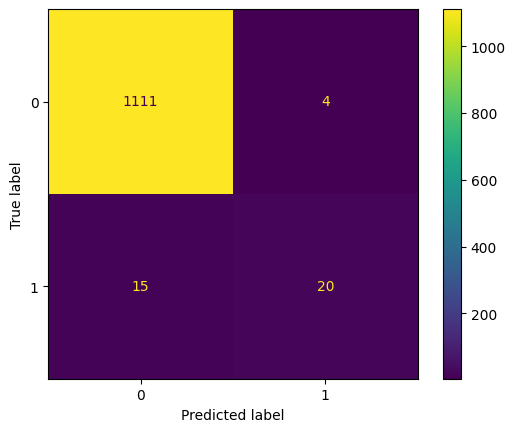

In [39]:
# OOS
y_pred = model_lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=model_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_lr.classes_)
disp.plot()
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-

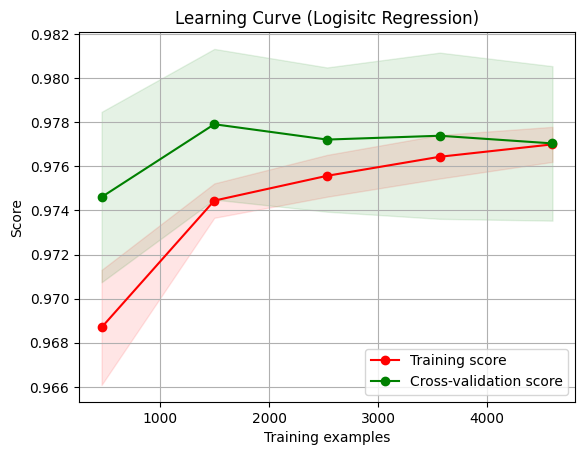

In [40]:
title = "Learning Curve (Logisitc Regression)"
plot_learning_curve(model_lr, title, X, y, cv=kf)
plt.show()

In [41]:
# Post Lasso Logistic Model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

IS_res = {
    "accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "G-mean": []
}

OOS_res = {
    "accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "G-mean": []
}
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler()
    scaler.fit(X)
    sel_ = SelectFromModel(
        LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))
    sel_.fit(scaler.transform(X_train), y_train)
    X_train = sel_.transform(scaler.transform(X_train))
    X_test = sel_.transform(scaler.transform(X_test))

    model_lr_PL = LogisticRegression()
    model_lr_PL.fit(X_train, y_train)

    # IS
    y_pred = model_lr_PL.predict(X_train)
    cm = confusion_matrix(y_train, y_pred, labels=model_lr_PL.classes_)
    IS_res['accuracy'].append(model_lr_PL.score(X_train,y_train))
    IS_res['Sensitivity'].append(recall_score(y_train, y_pred))
    IS_res['Specificity'].append(cm[0,0]/ (cm[0,0]+cm[0,1]))
    IS_res['G-mean'].append(sqrt(IS_res['Sensitivity'][i] * IS_res['Specificity'][i]))

    print("In Sample:")
    print("accuracy:\t", IS_res['accuracy'][i])
    print("Sensitivity:\t", IS_res['Sensitivity'][i])
    print("Specificity:\t", IS_res['Specificity'][i])
    print("G-mean:\t", IS_res['G-mean'][i])

    # OOS
    y_pred = model_lr_PL.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model_lr_PL.classes_)
    OOS_res['accuracy'].append(model_lr_PL.score(X_test, y_test))
    OOS_res['Sensitivity'].append(recall_score(y_test, y_pred))
    OOS_res['Specificity'].append(cm[0,0]/ (cm[0,0]+cm[0,1]))
    OOS_res['G-mean'].append(sqrt(OOS_res['Sensitivity'][i] * OOS_res['Specificity'][i]))

    print("Out of Sample:")
    print("accuracy:\t", OOS_res['accuracy'][i])
    print("Sensitivity:\t", OOS_res['Sensitivity'][i])
    print("Specificity:\t", OOS_res['Specificity'][i])
    print("G-mean:\t\t", OOS_res['G-mean'][i])

IS_res = pd.DataFrame(IS_res)
OOS_res = pd.DataFrame(OOS_res)

display(IS_res)
display(IS_res.mean(axis=0))
display(OOS_res)
display(OOS_res.mean(axis=0))

Fold 0:
In Sample:
accuracy:	 1.0
Sensitivity:	 1.0
Specificity:	 1.0
G-mean:	 1.0
Out of Sample:
accuracy:	 0.971304347826087
Sensitivity:	 0.6
Specificity:	 0.9899543378995433
G-mean:		 0.7706961805664577
Fold 1:
In Sample:
accuracy:	 1.0
Sensitivity:	 1.0
Specificity:	 1.0
G-mean:	 1.0
Out of Sample:
accuracy:	 0.9643478260869566
Sensitivity:	 0.4375
Specificity:	 0.9872958257713249
G-mean:		 0.6572228874399877
Fold 2:
In Sample:
accuracy:	 1.0
Sensitivity:	 1.0
Specificity:	 1.0
G-mean:	 1.0
Out of Sample:
accuracy:	 0.9765217391304348
Sensitivity:	 0.5454545454545454
Specificity:	 0.9892569382273948
G-mean:		 0.7345710949789537
Fold 3:
In Sample:
accuracy:	 1.0
Sensitivity:	 1.0
Specificity:	 1.0
G-mean:	 1.0
Out of Sample:
accuracy:	 0.9765217391304348
Sensitivity:	 0.4883720930232558
Specificity:	 0.995483288166215
G-mean:		 0.6972562348315053
Fold 4:
In Sample:
accuracy:	 1.0
Sensitivity:	 1.0
Specificity:	 1.0
G-mean:	 1.0
Out of Sample:
accuracy:	 0.9739130434782609
Sensitivi

,accuracy,Sensitivity,Specificity,G-mean
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


accuracy       1.0
Sensitivity    1.0
Specificity    1.0
G-mean         1.0
dtype: float64

,accuracy,Sensitivity,Specificity,G-mean
0,0.971304,0.600000,0.989954,0.770696
1,0.964348,0.437500,0.987296,0.657223
2,0.976522,0.545455,0.989257,0.734571
3,0.976522,0.488372,0.995483,0.697256
4,0.973913,0.571429,0.986547,0.750827


accuracy       0.972522
Sensitivity    0.528551
Specificity    0.989707
G-mean         0.722115
dtype: float64

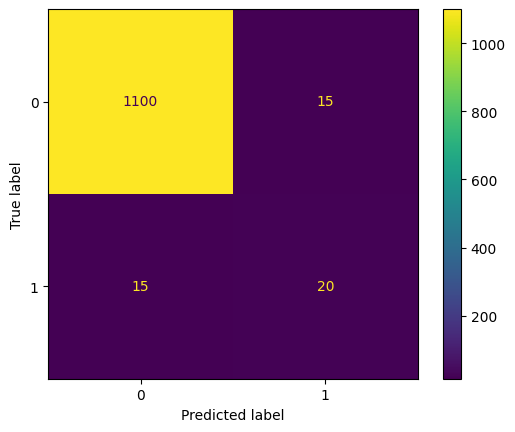

In [42]:
# OOS
y_pred = model_lr_PL.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=model_lr_PL.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_lr_PL.classes_)
disp.plot()
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-

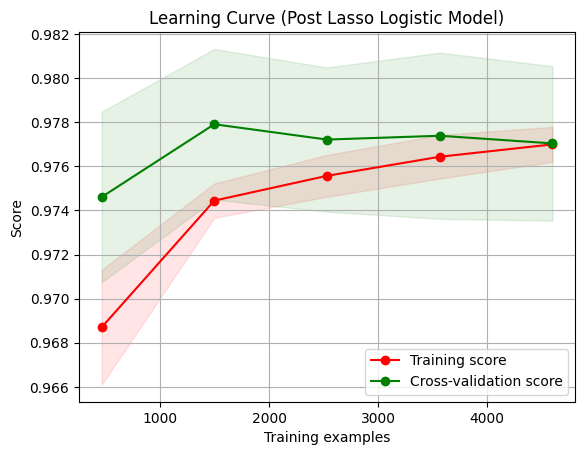

In [43]:
title = "Learning Curve (Post Lasso Logistic Model)"
plot_learning_curve(model_lr_PL, title, X, y, cv=kf)
plt.show()

In [44]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

IS_res = {
    "accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "G-mean": []
}

OOS_res = {
    "accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "G-mean": []
}
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_DT = DecisionTreeClassifier(random_state=0)
    model_DT.fit(X_train, y_train)

    # IS
    y_pred = model_DT.predict(X_train)
    cm = confusion_matrix(y_train, y_pred, labels=model_DT.classes_)
    IS_res['accuracy'].append(model_DT.score(X_train,y_train))
    IS_res['Sensitivity'].append(recall_score(y_train, y_pred))
    IS_res['Specificity'].append(cm[0,0]/ (cm[0,0]+cm[0,1]))
    IS_res['G-mean'].append(sqrt(IS_res['Sensitivity'][i] * IS_res['Specificity'][i]))

    print("In Sample:")
    print("accuracy:\t", IS_res['accuracy'][i])
    print("Sensitivity:\t", IS_res['Sensitivity'][i])
    print("Specificity:\t", IS_res['Specificity'][i])
    print("G-mean:\t", IS_res['G-mean'][i])

    # OOS
    y_pred = model_DT.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model_DT.classes_)
    OOS_res['accuracy'].append(model_DT.score(X_test, y_test))
    OOS_res['Sensitivity'].append(recall_score(y_test, y_pred))
    OOS_res['Specificity'].append(cm[0,0]/ (cm[0,0]+cm[0,1]))
    OOS_res['G-mean'].append(sqrt(OOS_res['Sensitivity'][i] * OOS_res['Specificity'][i]))

    print("Out of Sample:")
    print("accuracy:\t", OOS_res['accuracy'][i])
    print("Sensitivity:\t", OOS_res['Sensitivity'][i])
    print("Specificity:\t", OOS_res['Specificity'][i])
    print("G-mean:\t\t", OOS_res['G-mean'][i])

IS_res = pd.DataFrame(IS_res)
OOS_res = pd.DataFrame(OOS_res)

display(IS_res)
display(IS_res.mean(axis=0))
display(OOS_res)
display(OOS_res.mean(axis=0))

Fold 0:
In Sample:
accuracy:	 1.0
Sensitivity:	 1.0
Specificity:	 1.0
G-mean:	 1.0
Out of Sample:
accuracy:	 0.9791304347826087
Sensitivity:	 0.7818181818181819
Specificity:	 0.989041095890411
G-mean:		 0.8793465251722459
Fold 1:
In Sample:
accuracy:	 1.0
Sensitivity:	 1.0
Specificity:	 1.0
G-mean:	 1.0
Out of Sample:
accuracy:	 0.9852173913043478
Sensitivity:	 0.7708333333333334
Specificity:	 0.9945553539019963
G-mean:		 0.8755777627559924
Fold 2:
In Sample:
accuracy:	 1.0
Sensitivity:	 1.0
Specificity:	 1.0
G-mean:	 1.0
Out of Sample:
accuracy:	 0.9826086956521739
Sensitivity:	 0.6666666666666666
Specificity:	 0.9919427036705462
G-mean:		 0.8132005507747545
Fold 3:
In Sample:
accuracy:	 1.0
Sensitivity:	 1.0
Specificity:	 1.0
G-mean:	 1.0
Out of Sample:
accuracy:	 0.9878260869565217
Sensitivity:	 0.7441860465116279
Specificity:	 0.997289972899729
G-mean:		 0.8614924736513593
Fold 4:
In Sample:
accuracy:	 1.0
Sensitivity:	 1.0
Specificity:	 1.0
G-mean:	 1.0
Out of Sample:
accuracy:	 0

,accuracy,Sensitivity,Specificity,G-mean
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


accuracy       1.0
Sensitivity    1.0
Specificity    1.0
G-mean         1.0
dtype: float64

,accuracy,Sensitivity,Specificity,G-mean
0,0.979130,0.781818,0.989041,0.879347
1,0.985217,0.770833,0.994555,0.875578
2,0.982609,0.666667,0.991943,0.813201
3,0.987826,0.744186,0.997290,0.861492
4,0.986087,0.714286,0.994619,0.842877


accuracy       0.984174
Sensitivity    0.735558
Specificity    0.993490
G-mean         0.854499
dtype: float64

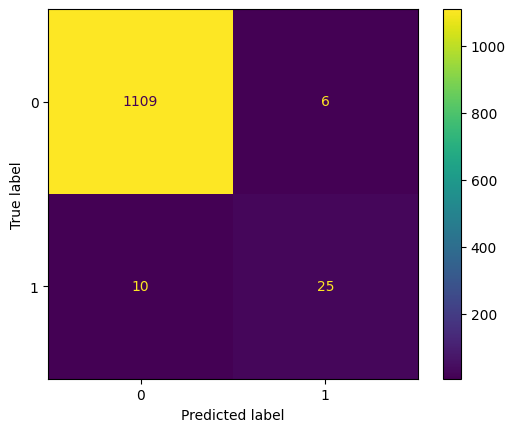

In [45]:
# OOS
y_pred = model_DT.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=model_DT.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_DT.classes_)
disp.plot()
plt.show()

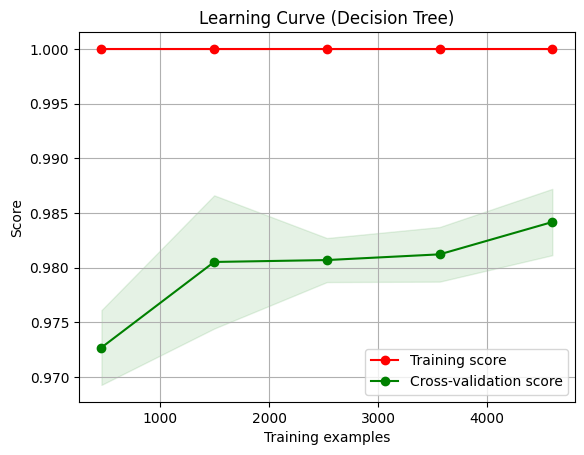

In [46]:
# Usage
title = "Learning Curve (Decision Tree)"
plot_learning_curve(model_DT, title, X, y, cv=kf)
plt.show()


In [47]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier


IS_res = {
    "accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "G-mean": []
}

OOS_res = {
    "accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "G-mean": []
}
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_RF = RandomForestClassifier(random_state=0)
    model_RF.fit(X_train, y_train)

    # IS
    y_pred = model_RF.predict(X_train)
    cm = confusion_matrix(y_train, y_pred, labels=model_RF.classes_)
    IS_res['accuracy'].append(model_RF.score(X_train,y_train))
    IS_res['Sensitivity'].append(recall_score(y_train, y_pred))
    IS_res['Specificity'].append(cm[0,0]/ (cm[0,0]+cm[0,1]))
    IS_res['G-mean'].append(sqrt(IS_res['Sensitivity'][i] * IS_res['Specificity'][i]))

    print("In Sample:")
    print("accuracy:\t", IS_res['accuracy'][i])
    print("Sensitivity:\t", IS_res['Sensitivity'][i])
    print("Specificity:\t", IS_res['Specificity'][i])
    print("G-mean:\t", IS_res['G-mean'][i])

    # OOS
    y_pred = model_RF.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model_RF.classes_)
    OOS_res['accuracy'].append(model_RF.score(X_test, y_test))
    OOS_res['Sensitivity'].append(recall_score(y_test, y_pred))
    OOS_res['Specificity'].append(cm[0,0]/ (cm[0,0]+cm[0,1]))
    OOS_res['G-mean'].append(sqrt(OOS_res['Sensitivity'][i] * OOS_res['Specificity'][i]))

    print("Out of Sample:")
    print("accuracy:\t", OOS_res['accuracy'][i])
    print("Sensitivity:\t", OOS_res['Sensitivity'][i])
    print("Specificity:\t", OOS_res['Specificity'][i])
    print("G-mean:\t\t", OOS_res['G-mean'][i])

IS_res = pd.DataFrame(IS_res)
OOS_res = pd.DataFrame(OOS_res)

display(IS_res)
display(IS_res.mean(axis=0))
display(OOS_res)
display(OOS_res.mean(axis=0))

Fold 0:
In Sample:
accuracy:	 1.0
Sensitivity:	 1.0
Specificity:	 1.0
G-mean:	 1.0
Out of Sample:
accuracy:	 0.9747826086956521
Sensitivity:	 0.509090909090909
Specificity:	 0.9981735159817352
G-mean:		 0.7128541664896197
Fold 1:
In Sample:
accuracy:	 1.0
Sensitivity:	 1.0
Specificity:	 1.0
G-mean:	 1.0
Out of Sample:
accuracy:	 0.9730434782608696
Sensitivity:	 0.375
Specificity:	 0.9990925589836661
G-mean:		 0.612094526702269
Fold 2:
In Sample:
accuracy:	 1.0
Sensitivity:	 1.0
Specificity:	 1.0
G-mean:	 1.0
Out of Sample:
accuracy:	 0.98
Sensitivity:	 0.5151515151515151
Specificity:	 0.9937332139659804
G-mean:		 0.7154880647718448
Fold 3:
In Sample:
accuracy:	 1.0
Sensitivity:	 1.0
Specificity:	 1.0
G-mean:	 1.0
Out of Sample:
accuracy:	 0.9765217391304348
Sensitivity:	 0.3953488372093023
Specificity:	 0.999096657633243
G-mean:		 0.6284836528144571
Fold 4:
In Sample:
accuracy:	 1.0
Sensitivity:	 1.0
Specificity:	 1.0
G-mean:	 1.0
Out of Sample:
accuracy:	 0.9852173913043478
Sensitivit

,accuracy,Sensitivity,Specificity,G-mean
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


accuracy       1.0
Sensitivity    1.0
Specificity    1.0
G-mean         1.0
dtype: float64

,accuracy,Sensitivity,Specificity,G-mean
0,0.974783,0.509091,0.998174,0.712854
1,0.973043,0.375000,0.999093,0.612095
2,0.980000,0.515152,0.993733,0.715488
3,0.976522,0.395349,0.999097,0.628484
4,0.985217,0.542857,0.999103,0.736458


accuracy       0.977913
Sensitivity    0.467490
Specificity    0.997840
G-mean         0.681076
dtype: float64

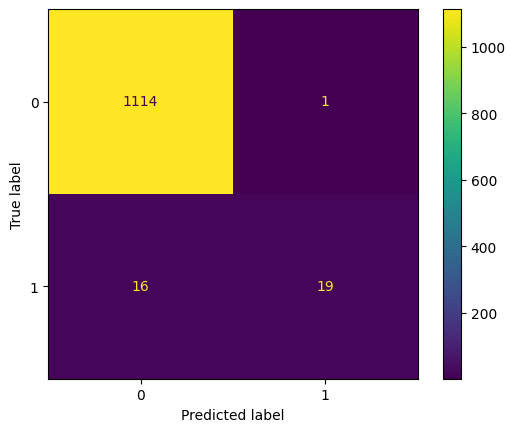

In [48]:
# OOS
y_pred = model_RF.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=model_RF.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_RF.classes_)
disp.plot()
plt.show()

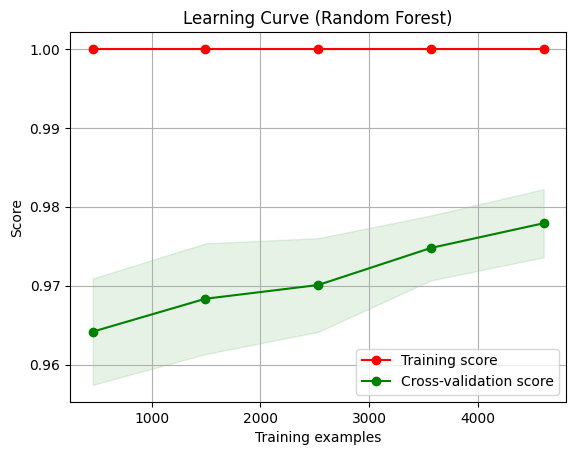

In [49]:
# Usage
title = "Learning Curve (Random Forest)"
plot_learning_curve(model_RF, title, X, y, cv=kf)
plt.show()


In [50]:
# KNN
from sklearn.neighbors import KNeighborsClassifier


IS_res = {
    "accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "G-mean": []
}

OOS_res = {
    "accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "G-mean": []
}
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_knn = KNeighborsClassifier(n_neighbors=5)
    model_knn.fit(X_train, y_train)

    # IS
    y_pred = model_knn.predict(X_train)
    cm = confusion_matrix(y_train, y_pred, labels=model_knn.classes_)
    IS_res['accuracy'].append(model_knn.score(X_train,y_train))
    IS_res['Sensitivity'].append(recall_score(y_train, y_pred))
    IS_res['Specificity'].append(cm[0,0]/ (cm[0,0]+cm[0,1]))
    IS_res['G-mean'].append(sqrt(IS_res['Sensitivity'][i] * IS_res['Specificity'][i]))

    print("In Sample:")
    print("accuracy:\t", IS_res['accuracy'][i])
    print("Sensitivity:\t", IS_res['Sensitivity'][i])
    print("Specificity:\t", IS_res['Specificity'][i])
    print("G-mean:\t", IS_res['G-mean'][i])

    # OOS
    y_pred = model_knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model_RF.classes_)
    OOS_res['accuracy'].append(model_knn.score(X_test, y_test))
    OOS_res['Sensitivity'].append(recall_score(y_test, y_pred))
    OOS_res['Specificity'].append(cm[0,0]/ (cm[0,0]+cm[0,1]))
    OOS_res['G-mean'].append(sqrt(OOS_res['Sensitivity'][i] * OOS_res['Specificity'][i]))

    print("Out of Sample:")
    print("accuracy:\t", OOS_res['accuracy'][i])
    print("Sensitivity:\t", OOS_res['Sensitivity'][i])
    print("Specificity:\t", OOS_res['Specificity'][i])
    print("G-mean:\t\t", OOS_res['G-mean'][i])

IS_res = pd.DataFrame(IS_res)
OOS_res = pd.DataFrame(OOS_res)

display(IS_res)
display(IS_res.mean(axis=0))
display(OOS_res)
display(OOS_res.mean(axis=0))

Fold 0:
In Sample:
accuracy:	 0.9778260869565217
Sensitivity:	 0.48427672955974843
Specificity:	 0.9954965097950912
G-mean:	 0.6943311847034603
Out of Sample:
accuracy:	 0.9660869565217391
Sensitivity:	 0.38181818181818183
Specificity:	 0.9954337899543378
G-mean:		 0.616502003079266
Fold 1:
In Sample:
accuracy:	 0.976304347826087
Sensitivity:	 0.463855421686747
Specificity:	 0.995489400090212
G-mean:	 0.6795315706157677
Out of Sample:
accuracy:	 0.9721739130434782
Sensitivity:	 0.3958333333333333
Specificity:	 0.9972776769509982
G-mean:		 0.62829590729722
Fold 2:
In Sample:
accuracy:	 0.9784782608695652
Sensitivity:	 0.5524861878453039
Specificity:	 0.9959266802443992
G-mean:	 0.7417787641484873
Out of Sample:
accuracy:	 0.9747826086956521
Sensitivity:	 0.45454545454545453
Specificity:	 0.990152193375112
G-mean:		 0.6708719541066455
Fold 3:
In Sample:
accuracy:	 0.9773913043478261
Sensitivity:	 0.4853801169590643
Specificity:	 0.9963874463761572
G-mean:	 0.6954327108057274
Out of Sampl

,accuracy,Sensitivity,Specificity,G-mean
0,0.977826,0.484277,0.995497,0.694331
1,0.976304,0.463855,0.995489,0.679532
2,0.978478,0.552486,0.995927,0.741779
3,0.977391,0.485380,0.996387,0.695433
4,0.976957,0.519553,0.995476,0.719168


accuracy       0.977391
Sensitivity    0.501110
Specificity    0.995755
G-mean         0.706048
dtype: float64

,accuracy,Sensitivity,Specificity,G-mean
0,0.966087,0.381818,0.995434,0.616502
1,0.972174,0.395833,0.997278,0.628296
2,0.974783,0.454545,0.990152,0.670872
3,0.970435,0.232558,0.999097,0.482025
4,0.973913,0.485714,0.989238,0.693172


accuracy       0.971478
Sensitivity    0.390094
Specificity    0.994240
G-mean         0.618173
dtype: float64

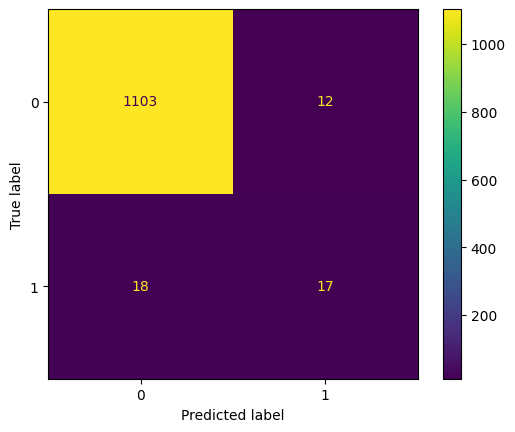

In [51]:
# OOS
y_pred = model_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=model_knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_knn.classes_)
disp.plot()
plt.show()

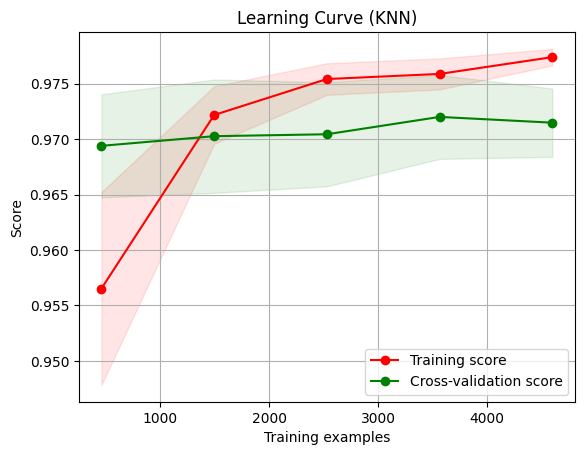

In [52]:
# Usage
title = "Learning Curve (KNN)"
plot_learning_curve(model_knn, title, X, y, cv=kf)
plt.show()


In [53]:
ModelPerformance = pd.DataFrame(columns=['Null Model',
                                        'Logistic',
                                        'Post Lasso',
                                        'Tree',
                                        'Random Forest',
                                        'KNN'],
                                index=['accuracy',
                                       'Sensitivity',
                                       'Specificity',
                                       'G-mean'])
ModelPerformance['Null Model'] = [0.944953, 0.000000, 1.000000, 0.000000]
ModelPerformance['Logistic'] = [0.964597, 0.446097, 0.994731, 0.665826]
ModelPerformance['Post Lasso'] = [0.943121, 0.407602, 0.974332, 0.630059]
ModelPerformance['Tree'] = [0.979990, 0.803890, 0.990393, 0.892104]
ModelPerformance['Random Forest'] = [0.975592, 0.621741, 0.996131, 0.786740]
ModelPerformance['KNN'] = [0.961445, 0.428071, 0.992478, 0.650721]

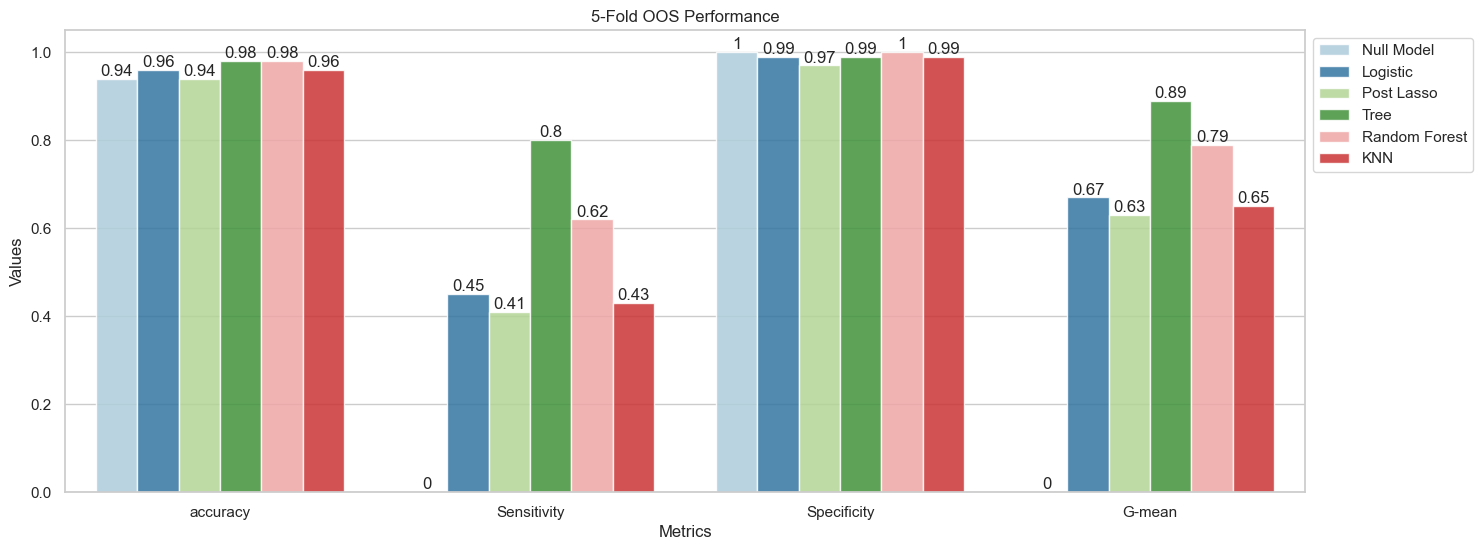

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.set_theme(style="whitegrid")

tmp = ModelPerformance.round(2).reset_index().melt(id_vars='index')


# who v/s fare barplot
ax = sns.barplot(x = 'index',
            y = 'value',
            hue = 'variable',
            palette = 'Paired',
            alpha=0.85,
            data = tmp)

for i in ax.containers:
    ax.bar_label(i,)

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title('5-Fold OOS Performance')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

[Text(0.4583333333333333, 0.875, 'amt <= 273.76\ngini = 0.075\nsamples = 4600\nvalue = [4421, 179]\nclass = 0'),
 Text(0.25, 0.625, 'job_Software engineer <= 0.5\ngini = 0.017\nsamples = 4367\nvalue = [4329, 38]\nclass = 0'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'city_Morrowville <= 0.5\ngini = 0.016\nsamples = 4365\nvalue = [4329, 36]\nclass = 0'),
 Text(0.08333333333333333, 0.125, '\n  (...)  \n'),
 Text(0.25, 0.125, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.6666666666666666, 0.625, 'amt <= 756.82\ngini = 0.478\nsamples = 233\nvalue = [92, 141]\nclass = 1'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'category_grocery_pos <= 0.5\ngini = 0.49\nsamples = 140\nvalue = [80, 60]\nclass = 0'),
 Text(0.4166666666666667, 0.125, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.125, '\n  (...)  \n'),
 Text(0.8333333333333334, 0.375, 'amt <= 1433.66\ngini = 0.225\nsamples = 93\nv

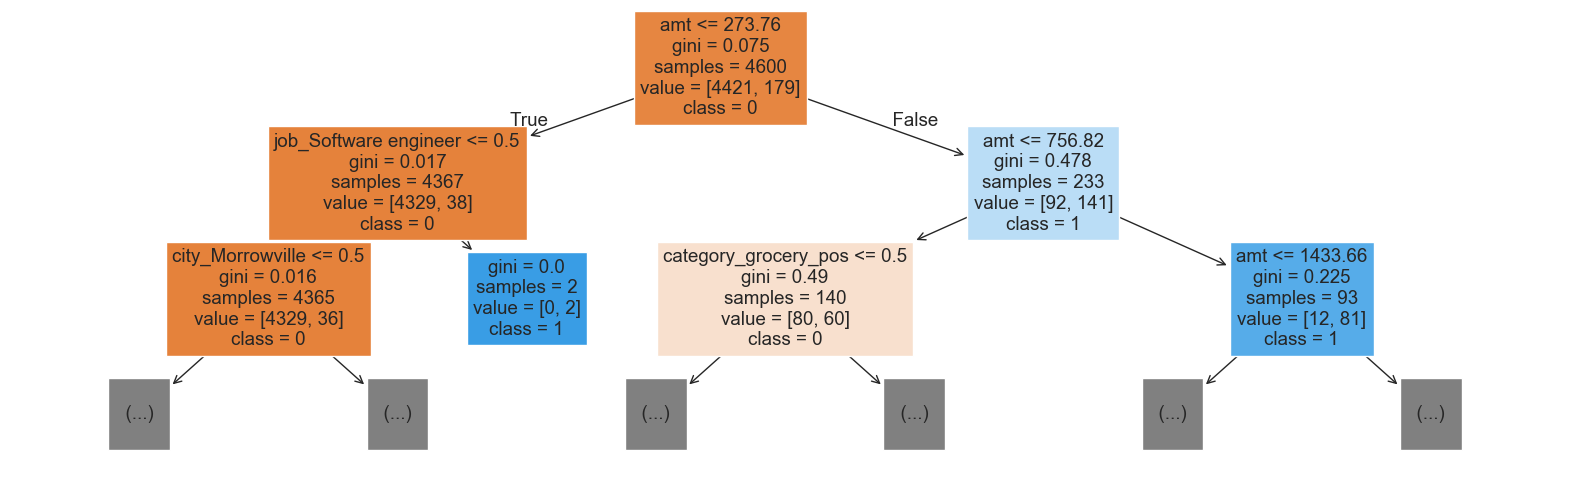

In [55]:
# Visualize Tree Model
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20, 6))
tree.plot_tree(model_DT,max_depth=2,
               feature_names=X.columns,
               class_names=['0', '1'],
               filled=True)

In [56]:
df_train.loc[30]

merchant      fraud_Witting, Beer and Ernser
category                                home
amt                                     2.13
gender                                     M
city                                Falmouth
state                                     MI
lat                                  44.2529
long                                 -85.017
city_pop                                1126
job                       Furniture designer
merch_lat                          43.368073
merch_long                        -84.313544
is_fraud                                   0
dob_year                                1955
dob_month                                  7
Name: 30, dtype: object

In [57]:

data_point = pd.DataFrame(X.loc[30,]).T
model_DT.predict_proba(data_point)

array([[1., 0.]])

In [58]:
data_point

,amt,lat,long,city_pop,merch_lat,merch_long,dob_year,dob_month,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,...,job_Video editor,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
30,2.13,44.2529,-85.017,1126,43.368073,-84.313544,1955,7,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
import numpy as np
x = list(np.linspace(0, data_point['amt'].values[0], 800))
amount = data_point['amt'].values[0]
profit = []
for limt in x:
    data_point['amt'] = amount - limt
    prob = model_DT.predict_proba(data_point)[0,1]
    profit.append(prob * limt - (1-prob) * limt)

In [60]:
x[234]

0.6238047559449311

In [61]:
# HYBRID
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from math import sqrt
from sklearn.model_selection import StratifiedKFold
import pandas as pd

# Assuming you have X and y already defined
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

IS_res = {
    "accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "G-mean": []
}

OOS_res = {
    "accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "G-mean": []
}

# Threshold for binary conversion
threshold = 0.5

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Logistic Regression model
    model_LR = LogisticRegression()
    model_LR.fit(X_train, y_train)

    # Train the Decision Tree model
    model_DT = DecisionTreeClassifier(random_state=0)
    model_DT.fit(X_train, y_train)

    # Get predictions from both models
    y_pred_LR = model_LR.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    y_pred_DT = model_DT.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    # Combine predictions using a simple average
    y_pred_hybrid = (y_pred_LR + y_pred_DT) / 2

    # Convert continuous predictions into binary form using the threshold
    y_pred_hybrid_binary = [1 if pred >= threshold else 0 for pred in y_pred_hybrid]

    # Calculate metrics for the hybrid model using the binary predictions
    cm = confusion_matrix(y_test, y_pred_hybrid_binary)
    accuracy = accuracy_score(y_test, y_pred_hybrid_binary)
    sensitivity = recall_score(y_test, y_pred_hybrid_binary)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    g_mean = sqrt(sensitivity * specificity)

    # Store the metrics in the results dictionary
    OOS_res['accuracy'].append(accuracy)
    OOS_res['Sensitivity'].append(sensitivity)
    OOS_res['Specificity'].append(specificity)
    OOS_res['G-mean'].append(g_mean)

# Evaluate the hybrid model
OOS_res = pd.DataFrame(OOS_res)
print("Out of Sample Evaluation for the Hybrid Model:")
print(OOS_res.mean(axis=0))


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-

Out of Sample Evaluation for the Hybrid Model:
accuracy       0.984174
Sensitivity    0.752270
Specificity    0.993135
G-mean         0.863059
dtype: float64


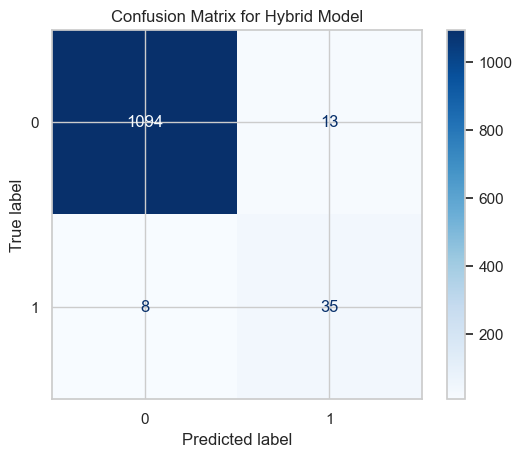

In [62]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already trained your hybrid model and have X_test and y_test available
# You already calculated y_pred_hybrid_binary as the binary predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_hybrid_binary, labels=[0, 1])  # Assuming binary labels 0 and 1

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Assuming binary labels 0 and 1

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)  # You can change the colormap if needed
plt.title("Confusion Matrix for Hybrid Model")
plt.show()


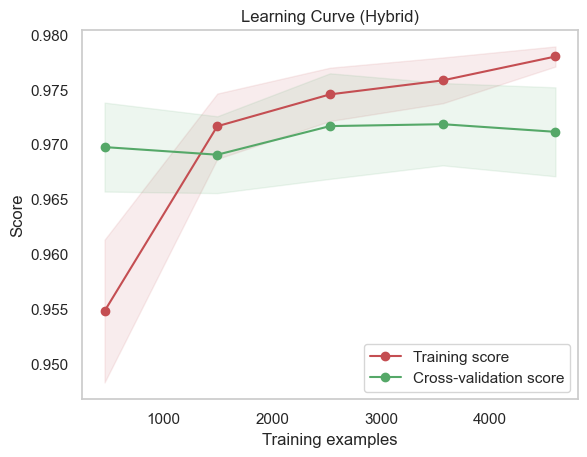

In [63]:
# Usage
title = "Learning Curve (Hybrid)"
plot_learning_curve(model_knn, title, X, y, cv=kf)
plt.show()

In [1]:
# Assuming you have already trained the hybrid model and have X available
# You can use the hybrid model for predictions
model_LR = LogisticRegression()
model_DT = DecisionTreeClassifier(random_state=0)

# Train the Logistic Regression model on the entire dataset
model_LR.fit(X, y)

# Train the Decision Tree model on the entire dataset
model_DT.fit(X, y)

# Get predictions from both models on the entire dataset
y_pred_LR = model_LR.predict_proba(X)[:, 1]  # Probabilities for the positive class
y_pred_DT = model_DT.predict_proba(X)[:, 1]  # Probabilities for the positive class

# Combine predictions using a simple average
y_pred_hybrid = (y_pred_LR + y_pred_DT) / 2

# Threshold for binary conversion
threshold = 0.5

# Convert continuous predictions into binary form using the threshold
y_pred_hybrid_binary = [1 if pred >= threshold else 0 for pred in y_pred_hybrid]

# Filter and print details of fraudulent transactions
for i, is_fraudulent in enumerate(y_pred_hybrid_binary):
    if is_fraudulent == 1:
        print("Details of Fraudulent Transaction #", i)
        # You can print the details of the transaction from your original dataset
        print("Amount:", X.iloc[i]['amt'])  # Modify this based on your column names
        #print("Date:", X.iloc[i]['trans_date'])  # Modify this based on your column names
        # Add more details as needed
        print("\n")

NameError: name 'LogisticRegression' is not defined